In [1]:
import pandas_datareader.data as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
# extract adj close data from yahoo finance
df = pdr.DataReader('AMZN','yahoo')
df = df[['Adj Close']]
df

,Adj Close
Date,
2016-02-03,531.070007
2016-02-04,536.260010
2016-02-05,502.130005
2016-02-08,488.100006
2016-02-09,482.070007
...,...
2021-01-26,3326.129883
2021-01-27,3232.580078
2021-01-28,3237.620117


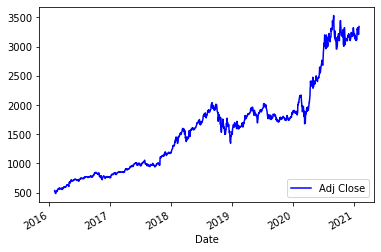

In [3]:
# plot stock data
df['Adj Close'].plot(color='b')
plt.legend(loc='lower right')
plt.show()

In [4]:
# set time series step
time_step = 30

In [5]:
# create scaled X dataset
df['Prediction'] = df[['Adj Close']].shift(-time_step)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

In [6]:
# test X data
X_forecast = X[-time_step:]

# train X data
X = X[:-time_step]

# train y data
y = np.array(df['Prediction'])
y = y[:-time_step]

In [7]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [8]:
# train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# evaluate model
confidence = model.score(X_test, y_test)
print(confidence)

0.959538838766993


In [10]:
# prediction using X test
forecast_predicted = model.predict(X_forecast)
print(forecast_predicted)

[3321.46038502 3286.61821321 3291.20244944 3291.54660687 3270.04232657
 3257.31171357 3369.91320481 3408.408436   3371.82595916 3342.55973062
 3271.41846215 3303.6800709  3222.59109629 3246.65568055 3267.44150443
 3198.13195395 3204.83128833 3250.43029446 3211.55063474 3188.05281081
 3204.76038152 3349.08686276 3393.21881448 3378.28218449 3380.07338431
 3412.58773753 3317.91850355 3323.01885239 3291.22270853 3429.53817024]


(17532.0, 18750.25)

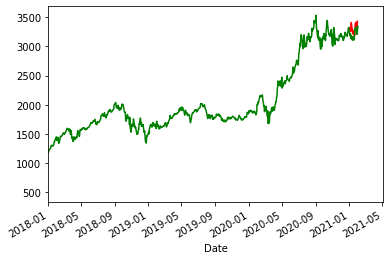

In [11]:
dates = pd.date_range(start="2021-01-01", end="2021-01-30")

plt.plot(dates, forecast_predicted, color='r')
df['Adj Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2018,1,1))